# Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer  # These are text feature extraction techniques
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

- CountVectorizer: Converts a collection of text documents into a matrix of token counts (word counts). Each document is represented as a vector, where each element in the vector is the frequency of a word in that document.

- TfidfTransformer: Converts raw count data into term-frequency inverse document frequency (TF-IDF) features. TF-IDF is a statistical measure used to evaluate how important a word is to a document relative to a collection of documents (corpus). It's used to scale the word frequencies by how commonly they appear across all documents.

- MultinomialNB is a classifier based on the Naive Bayes algorithm, specifically suited for classification tasks with discrete features like word counts

- confusion_matrix: Creates a matrix that shows the number of correct and incorrect predictions, broken down by each class. It helps to see the type of errors made by the classifier (e.g., false positives, false negatives).


# Load and Prepare Data

In [26]:
df = pd.read_csv('mail_data.csv', encoding='latin-1')

In [27]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
df.isnull().sum()

,0
Category,0
Message,0


In [16]:
df.shape

(5572, 2)

In [31]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


### so the data is unbalanced


# Feature Extraction

In [17]:
# Step 2: Data Preprocessing
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})  # Map 'ham' to 0 and 'spam' to 1
X = df['Message']  # Features
y = df['Category']  # Labels

- CountVectorizer(stop_words='english'): Converts the text data into numbers by counting how often each word appears in each document, while ignoring common English words like "the," "and," etc.

- TfidfTransformer(): Takes the raw word counts and adjusts them to give more importance to words that are unique to specific documents (and less importance to words that appear frequently across all documents). This helps capture the most relevant information in the text.

- stop_words='english' tells the vectorizer to ignore common English words (like "the", "is"


In [6]:
# Step 3: Feature Extraction
vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(X)

In [7]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

# Split Dataset

In [8]:
# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train the Model

In [9]:
# Step 5: Train the Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

# Evaluate the Model

In [10]:
# Step 6: Make predictions
y_pred = model.predict(X_test)

In [11]:
# Step 7: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9775784753363229

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.83      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
 [[966   0]
 [ 25 124]]


# 1. Handling Class Imbalance:
## A. Resampling Methods:
You can either oversample the minority class (spam) or undersample the majority class (ham) to make the classes more balanced.

1.1. Oversample the Minority Class (spam):
You can use the imbalanced-learn library's RandomOverSampler to increase the number of spam samples.

In [32]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Separate features and labels
X = df['Message']
y = df['Category']

# Reshape X and apply oversampling
X_resampled, y_resampled = ros.fit_resample(X.values.reshape(-1, 1), y)

# Check the new counts
print(pd.Series(y_resampled).value_counts())


Category
ham     4825
spam    4825
Name: count, dtype: int64


# Build a model again after use overSampling to handle imbalance in the data

In [34]:
# Text Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Transform the text data into numerical vectors
X_tfidf = tfidf.fit_transform(X_resampled.flatten())

# Check the shape of the resulting TF-IDF matrix
print(X_tfidf.shape)


(9650, 8476)


In [35]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_resampled, test_size=0.2, random_state=42)

# Check the dimensions of the training and test sets
print(X_train.shape, X_test.shape)


(7720, 8476) (1930, 8476)


In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9818652849740933

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.98      0.98       990
        spam       0.97      0.99      0.98       940

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930



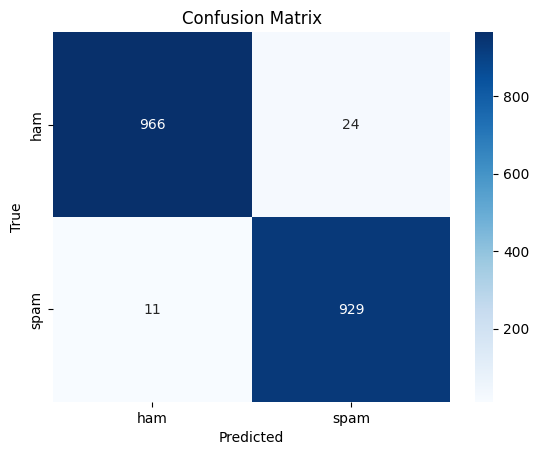

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Classify New Messages

In [12]:
# Step 8: Classify new messages
def classify_message(message):
    msg_transformed = tfidf_transformer.transform(vectorizer.transform([message]))
    prediction = model.predict(msg_transformed)[0]
    return "Spam" if prediction == 1 else "Ham"

In [13]:
# Test the function
new_message = "Congratulations! You have won a free ticket to Bahamas. Call now!"
print(f"The message is classified as: {classify_message(new_message)}")

The message is classified as: Spam
